# Heatmap

In [7]:
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017.csv 파일을 읽어옵니다.
marathon_2015_2017 = pd.read_csv("../marathon_data/marathon_2015_2017.csv")

# matplotlib 를 불러옵니다.
import matplotlib.pyplot as plt

# seaborn 을 불러옵니다.
import seaborn as sns

In [8]:
# marathon_2015_2017 에서 나이가 0~50까지 데이터만 가져옵니다.
marathon_2015_2017_under50 = marathon_2015_2017[marathon_2015_2017.Age.isin(range(0,50))]

In [9]:
# marathon_2015_2017_under50 의 기본정보를 확인합니다.
marathon_2015_2017_under50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57340 entries, 0 to 79637
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           57340 non-null  object
 1   Age            57340 non-null  int64 
 2   M/F            57340 non-null  object
 3   City           57339 non-null  object
 4   State          51478 non-null  object
 5   Country        57340 non-null  object
 6   5K             57340 non-null  int64 
 7   10K            57340 non-null  int64 
 8   15K            57340 non-null  int64 
 9   20K            57340 non-null  int64 
 10  Half           57340 non-null  int64 
 11  25K            57340 non-null  int64 
 12  30K            57340 non-null  int64 
 13  35K            57340 non-null  int64 
 14  40K            57340 non-null  int64 
 15  Pace           57340 non-null  int64 
 16  Official Time  57340 non-null  int64 
 17  Overall        57340 non-null  int64 
 18  Gender         57340 non-n

In [12]:
# marathon_2015_2017_under50 을 'Age'로 그룹핑을 하고 성별('M/F') 인원수를 계산합니다.
# unstack 함수를 사용하여 index 레벨에 있는 맨 끝 레벨인 'M/F'를 column 레벨로 변경합니다.
# fillna 함수를 사용하여 NaN 값이 존재한다면 0로 대체시킵니다.
marathon = marathon_2015_2017_under50.groupby('Age')['M/F'].value_counts().unstack().fillna(0)

In [5]:
marathon

M/F,F,M
Age,,
18,30,32
19,70,67
20,139,125
21,253,236
22,422,279
23,590,330
24,829,472
25,979,560
26,1060,649


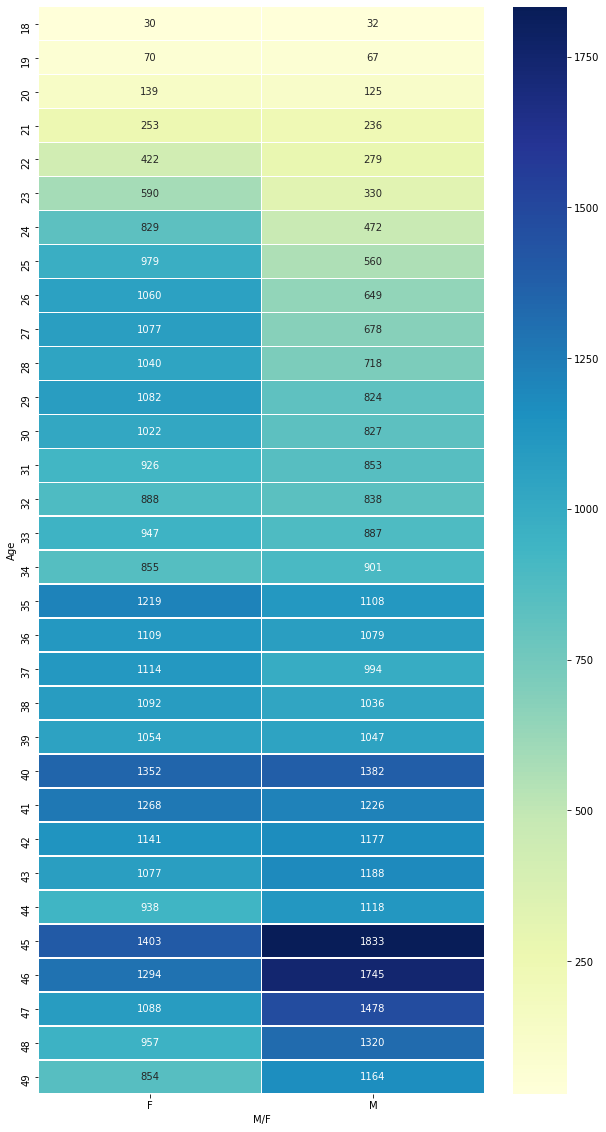

In [18]:
# 그림틀의 크기를 지정한다.
f, ax = plt.subplots(figsize=(10, 20))

sns.heatmap(marathon,        # DataFrame
            annot=True,     # 데이터 값 표시여부 
            fmt="d",        # 포멧은 정수형
            linewidths=.5,  # 구분선
            ax=ax,          # ax객체
            cmap="YlGnBu")  # 컬러 맵